In [1]:
import pandas as pd
import math
from datetime import datetime

import numpy as np
from pandas import Series, DataFrame
import nsepy as ns

In [2]:
df = pd.read_csv("../datasets/data/INDIGO.csv", index_col = "timestamp")

In [3]:
# ls
df.index = pd.to_datetime(df.index)

In [4]:
df.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2021-03-19,1718.00,1729.95,1651.45,1663.65,1663.65,52819,0.0,1.0
2021-03-18,1657.75,1730.00,1657.75,1718.20,1718.20,48587,0.0,1.0
2021-03-17,1682.60,1718.75,1671.45,1694.15,1694.15,38550,0.0,1.0
2021-03-16,1656.00,1700.15,1640.00,1682.60,1682.60,28853,0.0,1.0
2021-03-15,1689.00,1689.00,1630.20,1656.90,1656.90,43957,0.0,1.0


In [5]:
# Checking data from nse_py
# tata = ns.get_history(symbol="TATAMOTORS", 
#                     start = datetime(2005,1,1),
 #                    end = datetime(2021,3,19))

In [6]:
# tata.tail()

In [7]:
df.sort_values(["timestamp"], ascending = True, inplace=True)

In [8]:
df.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2015-11-10,856.0,898.00,848.10,878.45,832.7296,5066114,0.0,1.0
2015-11-13,921.0,1032.70,918.00,1003.25,951.0341,1679120,0.0,1.0
2015-11-16,1009.0,1039.50,965.45,987.60,936.1987,836121,0.0,1.0
2015-11-17,990.0,1049.00,977.00,1035.10,981.2264,753676,0.0,1.0
2015-11-18,1021.0,1067.65,1015.00,1044.40,990.0425,791693,0.0,1.0


In [9]:
df.tail()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2021-03-15,1689.00,1689.00,1630.20,1656.90,1656.90,43957,0.0,1.0
2021-03-16,1656.00,1700.15,1640.00,1682.60,1682.60,28853,0.0,1.0
2021-03-17,1682.60,1718.75,1671.45,1694.15,1694.15,38550,0.0,1.0
2021-03-18,1657.75,1730.00,1657.75,1718.20,1718.20,48587,0.0,1.0
2021-03-19,1718.00,1729.95,1651.45,1663.65,1663.65,52819,0.0,1.0


In [10]:
df.describe()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1.320000e+03,1320.000000,1320.0
mean,1188.167386,1209.632576,1166.076439,1187.348712,1170.409880,1.054086e+05,0.045455,1.0
std,261.137641,264.248954,257.521772,261.024635,270.650821,2.662122e+05,1.044598,0.0
min,730.000000,765.300000,697.000000,722.250000,684.659200,4.299000e+03,0.000000,1.0
25%,985.350000,1005.487500,956.087500,987.287500,956.674425,3.095675e+04,0.000000,1.0
50%,1155.075000,1175.900000,1135.450000,1158.475000,1138.717300,5.436550e+04,0.000000,1.0
75%,1345.000000,1377.287500,1326.437500,1351.987500,1350.901150,9.807625e+04,0.000000,1.0
max,1880.000000,1911.000000,1852.000000,1891.650000,1891.650000,6.469817e+06,34.000000,1.0


In [11]:
df = df[['open', 'high', 'low', 'close', 'adjusted_close', 'volume']]

In [12]:
df.head()

,open,high,low,close,adjusted_close,volume
timestamp,,,,,,
2015-11-10,856.0,898.00,848.10,878.45,832.7296,5066114
2015-11-13,921.0,1032.70,918.00,1003.25,951.0341,1679120
2015-11-16,1009.0,1039.50,965.45,987.60,936.1987,836121
2015-11-17,990.0,1049.00,977.00,1035.10,981.2264,753676
2015-11-18,1021.0,1067.65,1015.00,1044.40,990.0425,791693


In [13]:
df.shape

(1320, 6)

In [14]:
df.isnull().sum()

open              0
high              0
low               0
close             0
adjusted_close    0
volume            0
dtype: int64

In [15]:
 df.corr()

,open,high,low,close,adjusted_close,volume
open,1.000000,0.995601,0.996497,0.992991,0.990974,-0.092411
high,0.995601,1.000000,0.994753,0.997422,0.995624,-0.066604
low,0.996497,0.994753,1.000000,0.996515,0.994257,-0.102807
close,0.992991,0.997422,0.996515,1.000000,0.997993,-0.079360
adjusted_close,0.990974,0.995624,0.994257,0.997993,1.000000,-0.084136
volume,-0.092411,-0.066604,-0.102807,-0.079360,-0.084136,1.000000


In [16]:
import seaborn as sns

In [17]:
# sns.pairplot(df)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# corrmat = df.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20, 20))
# #plot heat map
# g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap="RdYlGn")

In [20]:
## Volatility 
#high to low percent
df['HL_PCT'] = (df['high'] - df['low']) / df['close'] * 100.0

#Change percent in close to open
df['PCT_change'] = (df['close'] - df['open']) / df['open'] * 100.0

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [22]:
#Dropping missing values
df.fillna(value=-99999, inplace=True)

#separate 1 percent of data to forecast
forecast_out = int(math.ceil(0.01 * len(df)))

# separate label, we want to predict the adj close
forecast_col = 'adjusted_close'
df['label'] = df[forecast_col].shift(-forecast_out)
X = np.array(df.drop(['label'], 1))
#df.head()

# Scale X - so all have the same distribution for Linear regression
X = preprocessing.scale(X)

#finally, we want to find Data series of late X early X (train) for model generation and evaluation
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

#separate label (y)
y = np.array(df['label'])
y = y[:-forecast_out]


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
#Linear regression
model = LinearRegression(n_jobs =-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [27]:
#Accuracy of the model
confidencereg = model.score(X_test, y_test)

reg = confidencereg * 100
print(reg)

83.36688471262363


In [28]:
forecast_reg = model.predict (X_forecast)

In [29]:
from datetime import timedelta
from textblob import TextBlob
import time
import nltk

In [30]:
df['Forecast_reg'] = np.nan

last_date = df.iloc[-1].name
# last_unix = datetime.strptime(last_date, '%Y-%m-%d')
last_unix = last_date
next_unix = last_unix + timedelta(days=1)

for i in forecast_reg:
    next_date = next_unix
    next_unix += timedelta(days=1)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns))]
    df['Forecast_reg'].loc[next_date] = i

In [31]:
df.iloc[-1].name

Timestamp('2021-04-02 00:00:00')

In [32]:
df.iloc[-50:-1]

,open,high,low,close,adjusted_close,volume,HL_PCT,PCT_change,label,Forecast_reg
timestamp,,,,,,,,,,
2021-01-28,1581.00,1624.00,1561.95,1588.35,1588.35,45313.0,3.906570,0.464896,1622.65,NaN
2021-01-29,1560.00,1643.75,1534.55,1545.30,1545.30,214279.0,7.066589,-0.942308,1591.40,NaN
2021-02-01,1574.00,1659.95,1559.65,1642.50,1642.50,66203.0,6.106545,4.351970,1564.80,NaN
2021-02-02,1645.00,1671.00,1598.00,1630.40,1630.40,54415.0,4.477429,-0.887538,1512.55,NaN
2021-02-03,1650.00,1663.70,1618.30,1621.70,1621.70,41317.0,2.799531,-1.715152,1530.35,NaN
2021-02-04,1624.00,1681.00,1611.90,1670.80,1670.80,56931.0,4.135743,2.881773,1612.45,NaN
2021-02-05,1695.00,1732.30,1668.50,1681.70,1681.70,66296.0,3.793780,-0.784661,1659.50,NaN
2021-02-08,1681.00,1743.10,1681.00,1695.90,1695.90,88489.0,3.661773,0.886377,1623.15,NaN
2021-02-09,1696.00,1709.80,1651.80,1661.55,1661.55,27420.0,3.490716,-2.031250,1674.90,NaN


In [33]:
from matplotlib import style
style.use('ggplot')

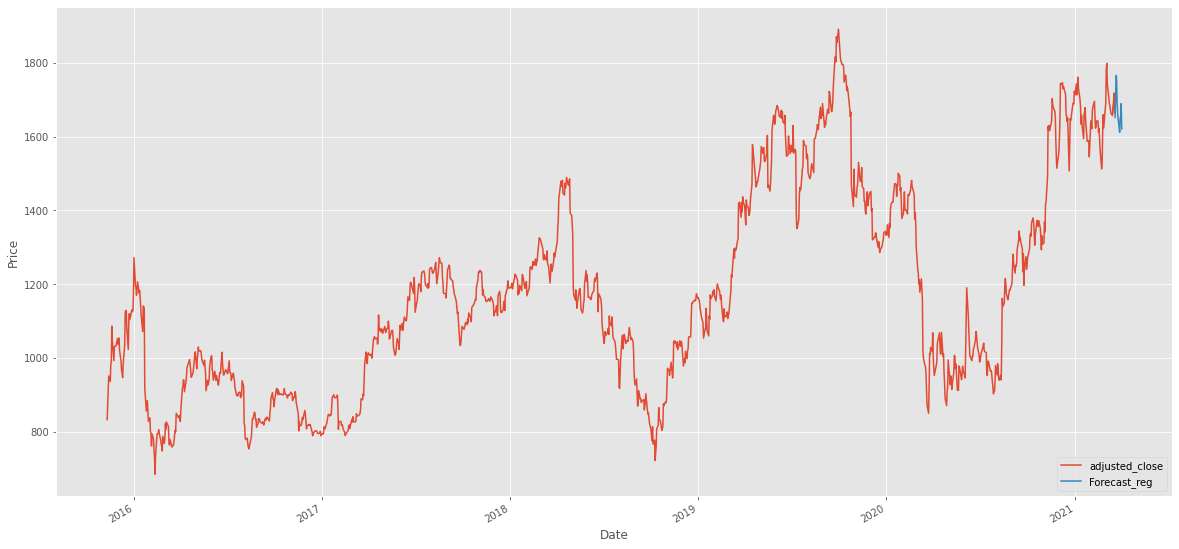

In [34]:
plt.figure(figsize=(20,10))
df['adjusted_close'].plot()
df['Forecast_reg'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regression
model_knn = KNeighborsRegressor(n_neighbors=2)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [36]:
confidence_model_knn = model_knn.score(X_test,y_test)
print(confidence_model_knn * 100)

81.57266787639142


In [37]:
forecast_knn = model_knn.predict(X_forecast)

In [38]:
df['Forecast_knn'] = np.nan

last_date = df.iloc[-40].name
# last_date = df.iloc[-26].name
last_unix = last_date
next_unix = last_unix + timedelta(days=1)
for i in forecast_knn:
    next_date = next_unix
    next_unix += timedelta(days=1)
    df['Forecast_knn'].loc[next_date] = i

In [39]:
df.iloc[-40].name

Timestamp('2021-02-11 00:00:00')

In [40]:
df.iloc[-50:-1]

,open,high,low,close,adjusted_close,volume,HL_PCT,PCT_change,label,Forecast_reg,Forecast_knn
timestamp,,,,,,,,,,,
2021-01-28,1581.00,1624.00,1561.95,1588.35,1588.35,45313.0,3.906570,0.464896,1622.65,NaN,NaN
2021-01-29,1560.00,1643.75,1534.55,1545.30,1545.30,214279.0,7.066589,-0.942308,1591.40,NaN,NaN
2021-02-01,1574.00,1659.95,1559.65,1642.50,1642.50,66203.0,6.106545,4.351970,1564.80,NaN,NaN
2021-02-02,1645.00,1671.00,1598.00,1630.40,1630.40,54415.0,4.477429,-0.887538,1512.55,NaN,NaN
2021-02-03,1650.00,1663.70,1618.30,1621.70,1621.70,41317.0,2.799531,-1.715152,1530.35,NaN,NaN
2021-02-04,1624.00,1681.00,1611.90,1670.80,1670.80,56931.0,4.135743,2.881773,1612.45,NaN,NaN
2021-02-05,1695.00,1732.30,1668.50,1681.70,1681.70,66296.0,3.793780,-0.784661,1659.50,NaN,NaN
2021-02-08,1681.00,1743.10,1681.00,1695.90,1695.90,88489.0,3.661773,0.886377,1623.15,NaN,NaN
2021-02-09,1696.00,1709.80,1651.80,1661.55,1661.55,27420.0,3.490716,-2.031250,1674.90,NaN,NaN


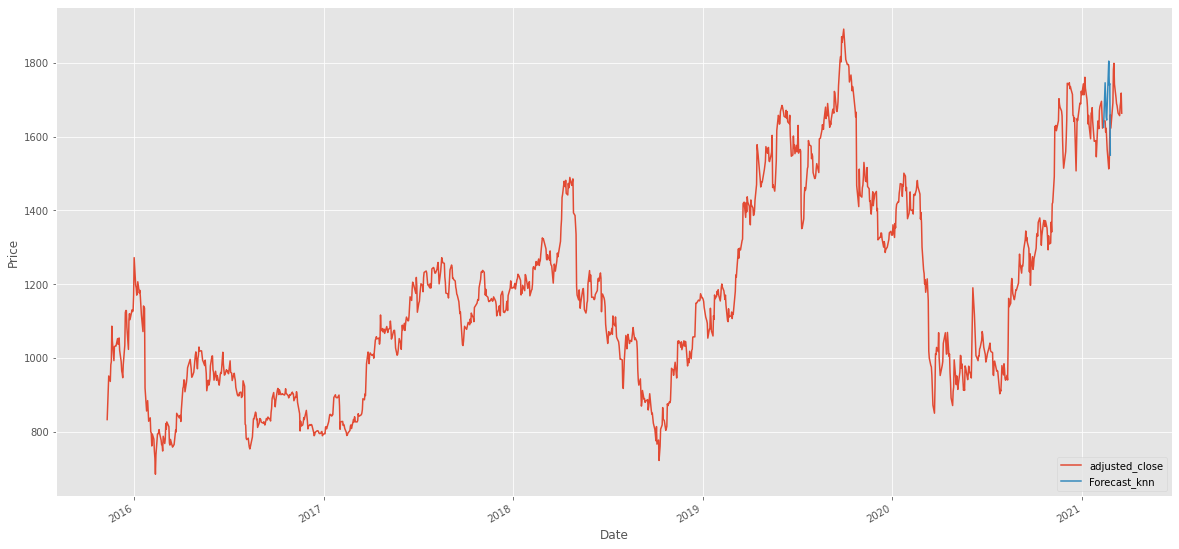

In [41]:
plt.figure(figsize=(20,10))
df['adjusted_close'].plot()
df['Forecast_knn'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [42]:
from sklearn.linear_model import BayesianRidge

In [43]:
# Bayesian Ridge Regression
model_by = BayesianRidge()
model_by.fit(X_train, y_train)

BayesianRidge()

In [44]:
confidence_model_by = model_by.score(X_test,y_test)
print(confidence_model_by * 100)

83.26134400438508


In [45]:
forecast_by = model_by.predict(X_forecast)

In [46]:
df['forecast_by'] = np.nan

last_date = df.iloc[-40].name
last_unix = last_date
next_unix = last_unix + timedelta(days=1)

for i in forecast_by:
    next_date = next_unix
    next_unix += timedelta(days=1)
    df['forecast_by'].loc[next_date] = i

In [47]:
df.iloc[-40].name

Timestamp('2021-02-11 00:00:00')

In [48]:
df.iloc[-50:-1]

,open,high,low,close,adjusted_close,volume,HL_PCT,PCT_change,label,Forecast_reg,Forecast_knn,forecast_by
timestamp,,,,,,,,,,,,
2021-01-28,1581.00,1624.00,1561.95,1588.35,1588.35,45313.0,3.906570,0.464896,1622.65,NaN,NaN,NaN
2021-01-29,1560.00,1643.75,1534.55,1545.30,1545.30,214279.0,7.066589,-0.942308,1591.40,NaN,NaN,NaN
2021-02-01,1574.00,1659.95,1559.65,1642.50,1642.50,66203.0,6.106545,4.351970,1564.80,NaN,NaN,NaN
2021-02-02,1645.00,1671.00,1598.00,1630.40,1630.40,54415.0,4.477429,-0.887538,1512.55,NaN,NaN,NaN
2021-02-03,1650.00,1663.70,1618.30,1621.70,1621.70,41317.0,2.799531,-1.715152,1530.35,NaN,NaN,NaN
2021-02-04,1624.00,1681.00,1611.90,1670.80,1670.80,56931.0,4.135743,2.881773,1612.45,NaN,NaN,NaN
2021-02-05,1695.00,1732.30,1668.50,1681.70,1681.70,66296.0,3.793780,-0.784661,1659.50,NaN,NaN,NaN
2021-02-08,1681.00,1743.10,1681.00,1695.90,1695.90,88489.0,3.661773,0.886377,1623.15,NaN,NaN,NaN
2021-02-09,1696.00,1709.80,1651.80,1661.55,1661.55,27420.0,3.490716,-2.031250,1674.90,NaN,NaN,NaN


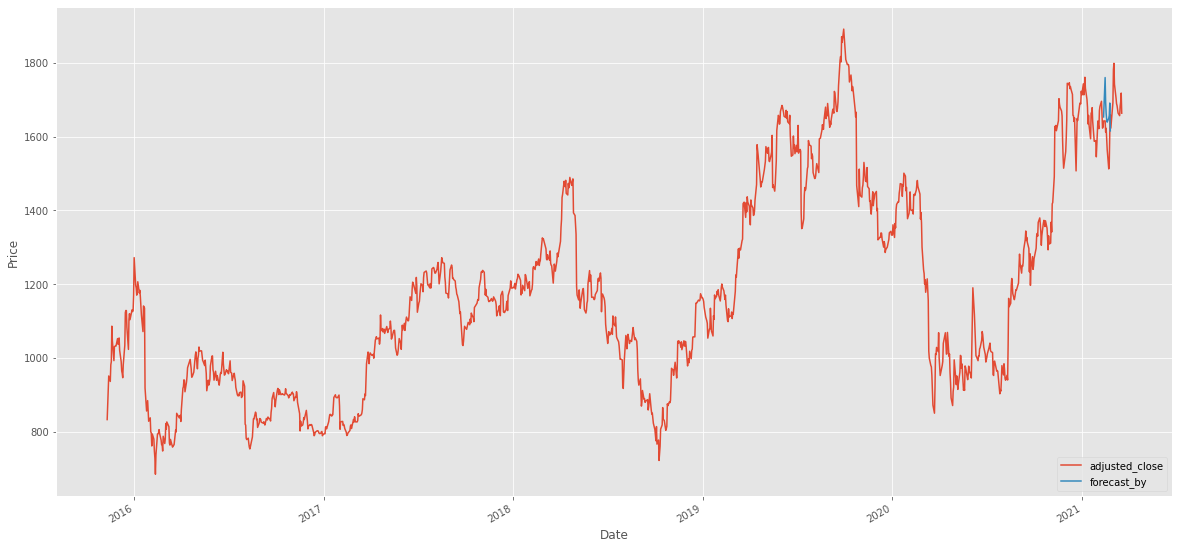

In [49]:
plt.figure(figsize=(20,10))
df['adjusted_close'].plot()
df['forecast_by'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

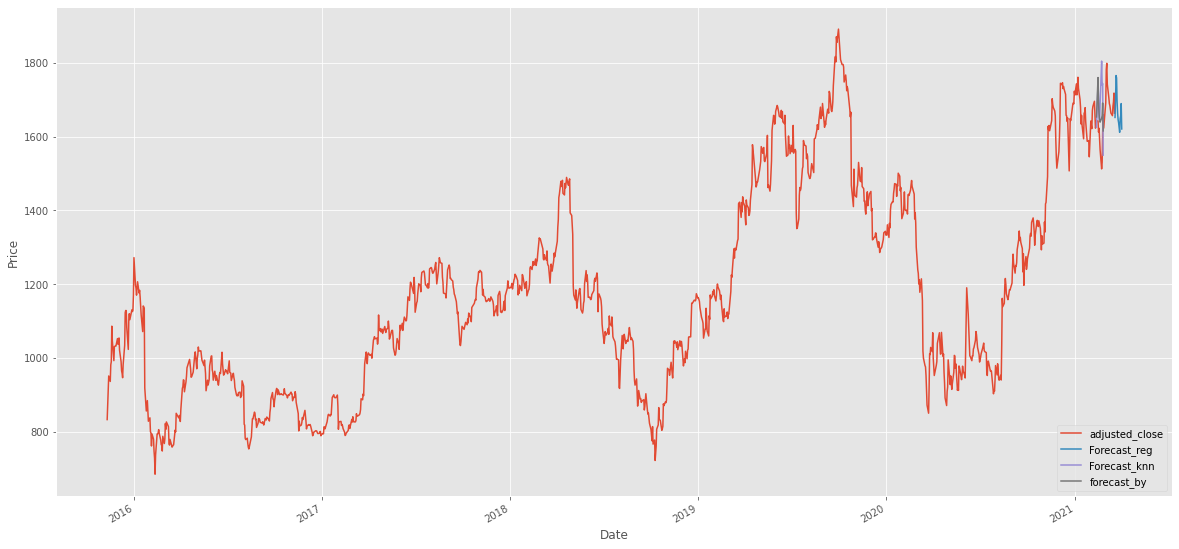

In [50]:
plt.figure(figsize=(20,10))
df['adjusted_close'].plot()
df['Forecast_reg'].plot()
df['Forecast_knn'].plot()
df['forecast_by'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [51]:
import tweepy

consumer_key = '9N4LhWmdtUZT0sbVpgbMyqEY5'
consumer_secret = '89HtqbHBzmaD9YQSPO6hdU7PQHoMHRSF6NvwxlTCfsY0HZZtZ6'
access_token ='863387980492414976-6ljbFkaBtFMQv3RO8pwAcZGlkI3HXzP'
access_token_secret ='mkxCMzl3p9Eydhenw0iTyN0kKmgnXI8WyI813khmwDSfq'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
user = tweepy.API(auth, wait_on_rate_limit=True)

tweets = tweepy.Cursor(user.search, q=str("BSE_TATAMOTORS"), tweet_mode='extended', lang='en').items(100)

In [52]:
tweet_list = []
global_polarity = 0
for tweet in tweets:
    tw = tweet.full_text
    blob = TextBlob(tw)
    polarity = 0
    for sentence in blob.sentences:
        polarity += sentence.sentiment.polarity
        global_polarity += sentence.sentiment.polarity
    tweet_list.append(tw)

global_polarity = global_polarity / len(tweet_list)


In [53]:
print(tweet_list)

['RT @jags0923: #Tatamotors reports domestic sales of 66,609 units vs 11012 YOY. up by 505% YoY &amp; 8.5% MoM #AutoSales #StockMarket #upyields…', 'TATAMOTORS - Announcement under Regulation 30 (LODR)-Press Release / Media Release https://t.co/waPO8Yj3GU', 'RT @jags0923: #Tatamotors reports domestic sales of 66,609 units vs 11012 YOY. up by 505% YoY &amp; 8.5% MoM #AutoSales #StockMarket #upyields…', 'RT @jags0923: #Tatamotors reports domestic sales of 66,609 units vs 11012 YOY. up by 505% YoY &amp; 8.5% MoM #AutoSales #StockMarket #upyields…', '#Tatamotors reports domestic sales of 66,609 units vs 11012 YOY. up by 505% YoY &amp; 8.5% MoM #AutoSales #StockMarket #upyields #NSE #BSE https://t.co/htV3w5O4jH', 'Tata Motors emerges winner in Covid-19-battered PV market in FY21\n\n.\n.\n#Tatamotors #car #sales #NSE #BSE #trading https://t.co/WaiwceScID', 'TATAMOTORS - Announcement under Regulation 30 (LODR)-Press Release / Media Release https://t.co/zAIcp2euCL', 'Equity Markets India @ 12:

In [54]:
print(global_polarity)

0.0
